In [1]:
import numpy as np
import matplotlib.pyplot as plt

from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from tensorflow.keras.applications import DenseNet121
from keras.preprocessing.image import ImageDataGenerator

from sklearn.model_selection import train_test_split

## Load the MNIST Dataset

Function: [***Datasets***](https://keras.io/api/datasets/) in Keras

x_train.shape = (50000, 28, 28, 1)
y_train.shape = (50000,)
x_val.shape = (10000, 28, 28, 1)
y_val.shape = (10000,)
x_test.shape = (10000, 28, 28, 1)
y_test.shape = (10000,)

This is one of the handwriting digits of 2:



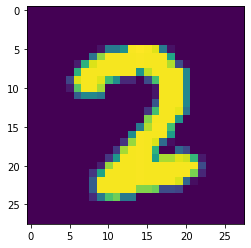

In [2]:
(x_train, y_train),(x_test, y_test) = keras.datasets.mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0  

x_train = x_train.reshape(-1,28,28,1)
x_test = x_test.reshape(-1,28,28,1)

# Split the data into training and testing datasets
x_train, x_val, y_train, y_val = train_test_split(
	x_train, y_train, test_size = 1/6)

# Print the dataset sizes
print('x_train.shape =', x_train.shape)
print('y_train.shape =', y_train.shape)
print('x_val.shape =', x_val.shape)
print('y_val.shape =', y_val.shape)
print('x_test.shape =', x_test.shape)
print('y_test.shape =', y_test.shape)

# Pick a random integer/digit within the training set
random_digit = np.random.randint(0, len(y_train)-1)

# Plot the image of this digit for visualization and comparison after training
print("\nThis is one of the handwriting digits of \033[1m"+str(y_train[random_digit])+":\n")
plt.imshow(x_train[random_digit])
plt.show()

print()

## Define and Compile ConvNet, Simple ANN and Transfer Learning Models

#### Layers

Layers  Class: [***Layers***](https://keras.io/api/layers/) in Keras

Flatten Layer: [***Flatten layer***](https://keras.io/api/layers/reshaping_layers/flatten/) in Keras

Dense Layer: [***Dense layer***](https://keras.io/api/layers/core_layers/dense/) in Keras

Conv2D Layer: [***Conv2D layer***](https://keras.io/api/layers/convolution_layers/convolution2d/) in Keras

#### Metrics
Metrics arguments: [***Metrics***](https://keras.io/api/metrics/) in Keras

Accuracy arguments: [***Accuracy***](https://keras.io/api/metrics/accuracy_metrics/#accuracy-class) in Keras

#### Losses

Losses class: [***Losses***](https://keras.io/api/losses/) in Keras

Sparse Categorical Crossentropy class: [***SparseCategoricalCrossentropy***](https://keras.io/api/losses/probabilistic_losses/#sparsecategoricalcrossentropy-class) in Keras

#### Optimizers

Optimizers arguments: [***Optimizers***](https://keras.io/api/optimizers/) in Keras

Adam Class: [***Adam***](https://keras.io/api/models/model_training_apis/) in Keras

#### Layer Activation

Layer Activation: [***Layer activation functions***](https://keras.io/api/layers/activations/) in Keras

ReLU function: [***ReLU***](https://keras.io/api/layers/activations/) in Keras

Softmax function: [***Softmax***](https://keras.io/api/layers/activations/) in Keras


#### Other
Sequential Class: [***Sequential***](https://keras.io/api/models/sequential/) in Keras

Summary Method: [***Summary***](https://keras.io/api/models/model/) in Keras

Compile Method: [***Compile***](https://keras.io/api/models/model_training_apis/) in Keras


In [3]:
# Define a function to generate and complie the ConvNet
def make_conv_model():
    model = Sequential()
    
    model.add(Conv2D(filters = 10, kernel_size = (5,5),padding = 'Same', 
                activation ='relu', input_shape = (28,28,1)))
    model.add(Conv2D(filters = 10, kernel_size = (5,5),padding = 'Same', 
                activation ='relu'))
    model.add(MaxPool2D(pool_size=(2,2)))
    model.add(Flatten())
    model.add(Dense(64, activation = "relu"))
    model.add(Dropout(0.2))
    model.add(Dense(10, activation = "softmax"))
    
    model.compile(optimizer=keras.optimizers.Adam(),
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'] ) 
    
    model.summary()
    return model

# Define a function to generate and complie the ANN
def make_dense_model():
    model = Sequential()
    
    model.add(Flatten(input_shape = (28,28,1)))
    model.add(Dense(512, activation = "relu"))
    model.add(Dropout(0.2))
    model.add(Dense(256, activation = "relu"))
    model.add(Dropout(0.2))
    model.add(Dense(10, activation = "softmax"))

    model.compile(optimizer=keras.optimizers.Adam(),
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy']  ) 
    
    model.summary()
    return model

# Define a function to generate a transfer learning model from DenseNet121 model
def make_transfer_learning_model():
    model = Sequential()

    model.add(keras.applications.DenseNet121(weights='imagenet',  # Load weights pre-trained on ImageNet.
                                      include_top=False,          # Do not include the ImageNet classifier at the top.
                                     input_shape = (32,32,3)))
    #model.add(keras.layers.Flatten())
    model.add(keras.layers.GlobalMaxPool2D())
    #model.add(keras.layers.GlobalAveragePooling2D())
    model.add(keras.layers.Dense(128, activation='relu'))
    model.add(keras.layers.Dropout(0.2))  # Regularize with dropout
    model.add(keras.layers.Dense(10, activation='softmax'))

    for layer in model.layers[:-3]:
        layer.trainable =  False
 
    model.compile(optimizer=keras.optimizers.Adam(),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'] ) 

    model.summary()
    
    return model

# Define the parameters for training the models
epochs = 30
batch_size = 256

## Define and Train ConvNet and Simple ANN

Fit Method: [***Fit***](https://keras.io/api/models/model_training_apis/) in Keras

In [4]:
simple_conv_model = make_conv_model()
simple_conv_history = simple_conv_model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_val, y_val), verbose=1)
simple_conv_test_loss, simple_conv_test_acc = simple_conv_model.evaluate(x_test, y_test)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 10)        260       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 10)        2510      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 10)        0         
_________________________________________________________________
flatten (Flatten)            (None, 1960)              0         
_________________________________________________________________
dense (Dense)                (None, 64)                125504    
_________________________________________________________________
dropout (Dropout)            (None, 64)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                6

Fit Method: [***Fit***](https://keras.io/api/models/model_training_apis/) in Keras

Evaluate Method: [***Evaluate***](https://keras.io/api/models/model_training_apis/) in Keras

In [5]:
dense_model = make_dense_model()
dense_history = dense_model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_val, y_val),verbose=1)
dense_test_loss, dense_test_acc = dense_model.evaluate(x_test, y_test)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               401920    
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 256)               131328    
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 10)                2570      
Total params: 535,818
Trainable params: 535,818
Non-trainable params: 0
________________________________________________

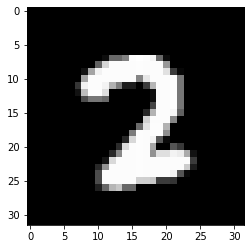

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
densenet121 (Functional)     (None, 1, 1, 1024)        7037504   
_________________________________________________________________
global_max_pooling2d (Global (None, 1024)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 128)               131200    
_________________________________________________________________
dropout_3 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 10)                1290      
Total params: 7,169,994
Trainable params: 132,490
Non-trainable params: 7,037,504
_________________________________________________________________
Epoch 1/30
196/196 [==============================] - 99s 506ms/step - loss: 0.6718 - accuracy: 0.7872 -

In [6]:
# add padding to the images to make them as 32 x 32, because pre-trained deep learning models require at least 32 x 32 input
x_train_exp = np.pad(x_train,((0,0),(2,2),(2,2), (0,0)), 'constant')
x_test_exp  = np.pad(x_test, ((0,0),(2,2),(2,2), (0,0)), 'constant')
x_val_exp   = np.pad(x_val,  ((0,0),(2,2),(2,2), (0,0)), 'constant')

# create 3 channel image datasets, because pre-trained deep learning models require exactly 3 inputs channels
# we give the same values to the RGB channels, so the output is in black colors
x_train3 = np.concatenate((x_train_exp,x_train_exp,x_train_exp), axis = 3)
x_test3  = np.concatenate((x_test_exp,x_test_exp,x_test_exp), axis = 3)
x_val3   = np.concatenate((x_val_exp,x_val_exp,x_val_exp), axis = 3)

#print(x_train3.shape, x_test3.shape, x_val3.shape)   
plt.imshow(x_train3[random_digit])
plt.show()

#use the function to generate the transfer learning model
transfer_learning_model = make_transfer_learning_model()

'''
# print out the initial loss and accuracy "before" training
loss0, accuracy0 = transfer_learning_model.evaluate(x_val3, y_val)
print("initial loss: {:.2f}".format(loss0))
print("initial accuracy: {:.2f}%".format(accuracy0*100))
'''

transfer_learning_history = transfer_learning_model.fit(x_train3, y_train, batch_size=batch_size,
                                epochs = epochs, validation_data = (x_val3, y_val), verbose=1)


transfer_learning_test_loss, transfer_learning_test_acc = transfer_learning_model.evaluate(x_test3, y_test)


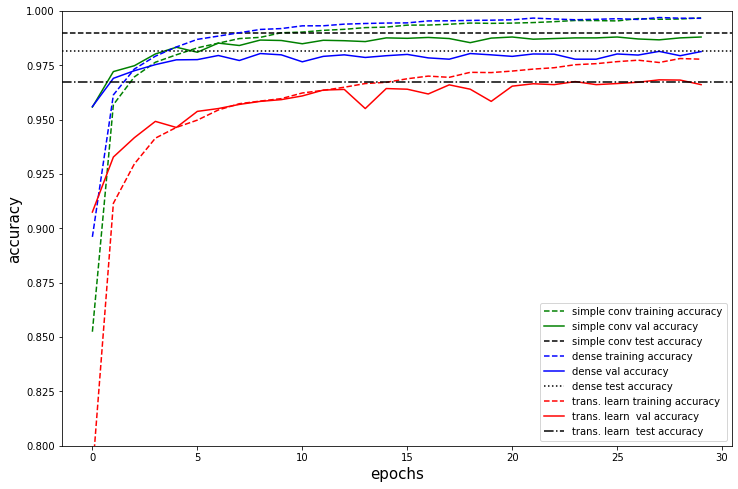

In [7]:
# Plot the accuracy curves of both models for training, evaluation and testing data
plt.figure(figsize=(12,8))
plt.plot(simple_conv_history.history["accuracy"], "g--",label="simple conv training accuracy")
plt.plot(simple_conv_history.history["val_accuracy"], "g-",label="simple conv val accuracy")
plt.axhline(simple_conv_test_acc,color="k", linestyle="--", label="simple conv test accuracy")

plt.plot(dense_history.history["accuracy"], "b--",label="dense training accuracy")
plt.plot(dense_history.history["val_accuracy"], "b-",label="dense val accuracy")
plt.axhline(dense_test_acc, color="k", linestyle=":", label="dense test accuracy")

plt.plot(transfer_learning_history.history["accuracy"], "r--",label="trans. learn training accuracy")
plt.plot(transfer_learning_history.history["val_accuracy"], "r-",label="trans. learn  val accuracy")
plt.axhline(transfer_learning_test_acc, color="k", linestyle="-.", label="trans. learn  test accuracy")

plt.xlabel("epochs", fontsize=15)
plt.ylabel("accuracy", fontsize=15)
plt.ylim(0.80, 1.00)
plt.legend()
plt.show()


## Data Augmentation

ImageDataGenerator function: [***ImageDataGenerator***](https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator) in Keras


In [8]:
# Perform data augmentation over the image datasets
datagen = ImageDataGenerator(
        # set input mean to 0 over the dataset
        featurewise_center=False, 
         # set each sample mean to 0
        samplewise_center=False, 
        # divide inputs by std of the dataset
        featurewise_std_normalization=False, 
        # divide each input by its std
        samplewise_std_normalization=False,
        # apply ZCA whitening
        zca_whitening=False,  
        # randomly rotate images by degrees
        rotation_range=10,  
        # Randomly zoom image
        zoom_range = 0.1,  
        # randomly shift images horizontally 
        width_shift_range=0.1,  
        # randomly shift images vertically 
        height_shift_range=0.1,  
        # randomly flip images
        horizontal_flip=False,  
        # randomly flip images
        vertical_flip=False)  

datagen.fit(x_train.reshape(-1,28,28,1))

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 28, 28, 10)        260       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 28, 28, 10)        2510      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 10)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 1960)              0         
_________________________________________________________________
dense_7 (Dense)              (None, 64)                125504    
_________________________________________________________________
dropout_4 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_8 (Dense)              (None, 10)               

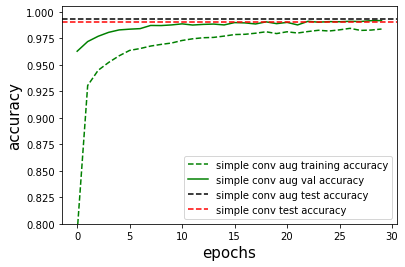

In [9]:
# use the function to generate the ConvNet model
simple_conv_model = make_conv_model()

simple_conv_aug_history = simple_conv_model.fit(
    datagen.flow(x_train,y_train, batch_size=batch_size),
    epochs = epochs, validation_data = (x_val,y_val),
    steps_per_epoch=x_train.shape[0]//batch_size, verbose=1)

simple_conv_aug_test_loss, simple_conv_aug_test_acc = simple_conv_model.evaluate(x_test, y_test)

plt.plot(simple_conv_aug_history.history["accuracy"], "g--",label="simple conv aug training accuracy")
plt.plot(simple_conv_aug_history.history["val_accuracy"], "g-",label="simple conv aug val accuracy")
plt.axhline(simple_conv_aug_test_acc,color="k", linestyle="--", label="simple conv aug test accuracy")
plt.axhline(simple_conv_test_acc,color="r", linestyle="--", label="simple conv test accuracy")
plt.xlabel("epochs", fontsize=15)
plt.ylabel("accuracy", fontsize=15)
plt.ylim(0.80, 1.005)
plt.legend()
plt.show()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
densenet121 (Functional)     (None, 1, 1, 1024)        7037504   
_________________________________________________________________
global_max_pooling2d_1 (Glob (None, 1024)              0         
_________________________________________________________________
dense_9 (Dense)              (None, 128)               131200    
_________________________________________________________________
dropout_5 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 10)                1290      
Total params: 7,169,994
Trainable params: 132,490
Non-trainable params: 7,037,504
_________________________________________________________________
Epoch 1/30
196/196 [==============================] - 107s 546ms/step - loss: 0.7741 - accuracy: 0.7502 

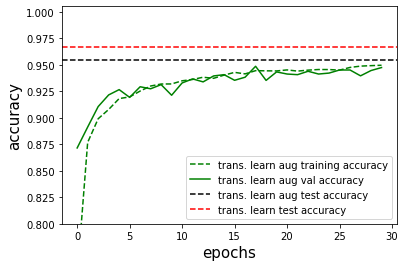

In [10]:
# use the function to generate the transfer learning model
transfer_learning_model = make_transfer_learning_model()

transfer_learning_aug_history = transfer_learning_model.fit(
                                datagen.flow(x_train3,y_train, batch_size=batch_size),
                                epochs = epochs, validation_data = (x_val3, y_val), verbose=1)

transfer_learning_aug_test_loss, transfer_learning_aug_test_acc = transfer_learning_model.evaluate(x_test3, y_test)


plt.plot(transfer_learning_aug_history.history["accuracy"], "g--",label="trans. learn aug training accuracy")
plt.plot(transfer_learning_aug_history.history["val_accuracy"], "g-",label="trans. learn aug val accuracy")
plt.axhline(transfer_learning_aug_test_acc,color="k", linestyle="--", label="trans. learn aug test accuracy")
plt.axhline(transfer_learning_test_acc,color="r", linestyle="--", label="trans. learn test accuracy")
plt.xlabel("epochs", fontsize=15)
plt.ylabel("accuracy", fontsize=15)
plt.ylim(0.80, 1.005)
plt.legend()
plt.show()